In [5]:
import pandas as pd

# Läser in fliken "Veckodata Riket" från datafilen "fhm_covid19".
df_covid19 = pd.read_excel('Data/fhm_covid19.xlsx', sheet_name='Veckodata Riket')

# En initial dataanalys av "Veckodata Riket".
print(df_covid19.info())
print(df_covid19.describe())
print(df_covid19['Antal_fall_100000inv_14dagar'].value_counts())
print(df_covid19.head())
print(df_covid19.columns)
print(df_covid19.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [6]:
# Konkatenera kolumnerna "år" och "veckonummer" till en "Vecka"-kolumn med formatet 'ÅrVeckonummer'.
# Formaterar veckonumret så att det alltid har två siffror genom att lägga till en inledande nolla vid ental. 
df_covid19['Vecka'] = df_covid19['år'].astype(str) + "v" + df_covid19['veckonummer'].astype(str).str.zfill(2) 

print(df_covid19['Vecka'].head())

0    2020v06
1    2020v07
2    2020v08
3    2020v09
4    2020v10
Name: Vecka, dtype: object


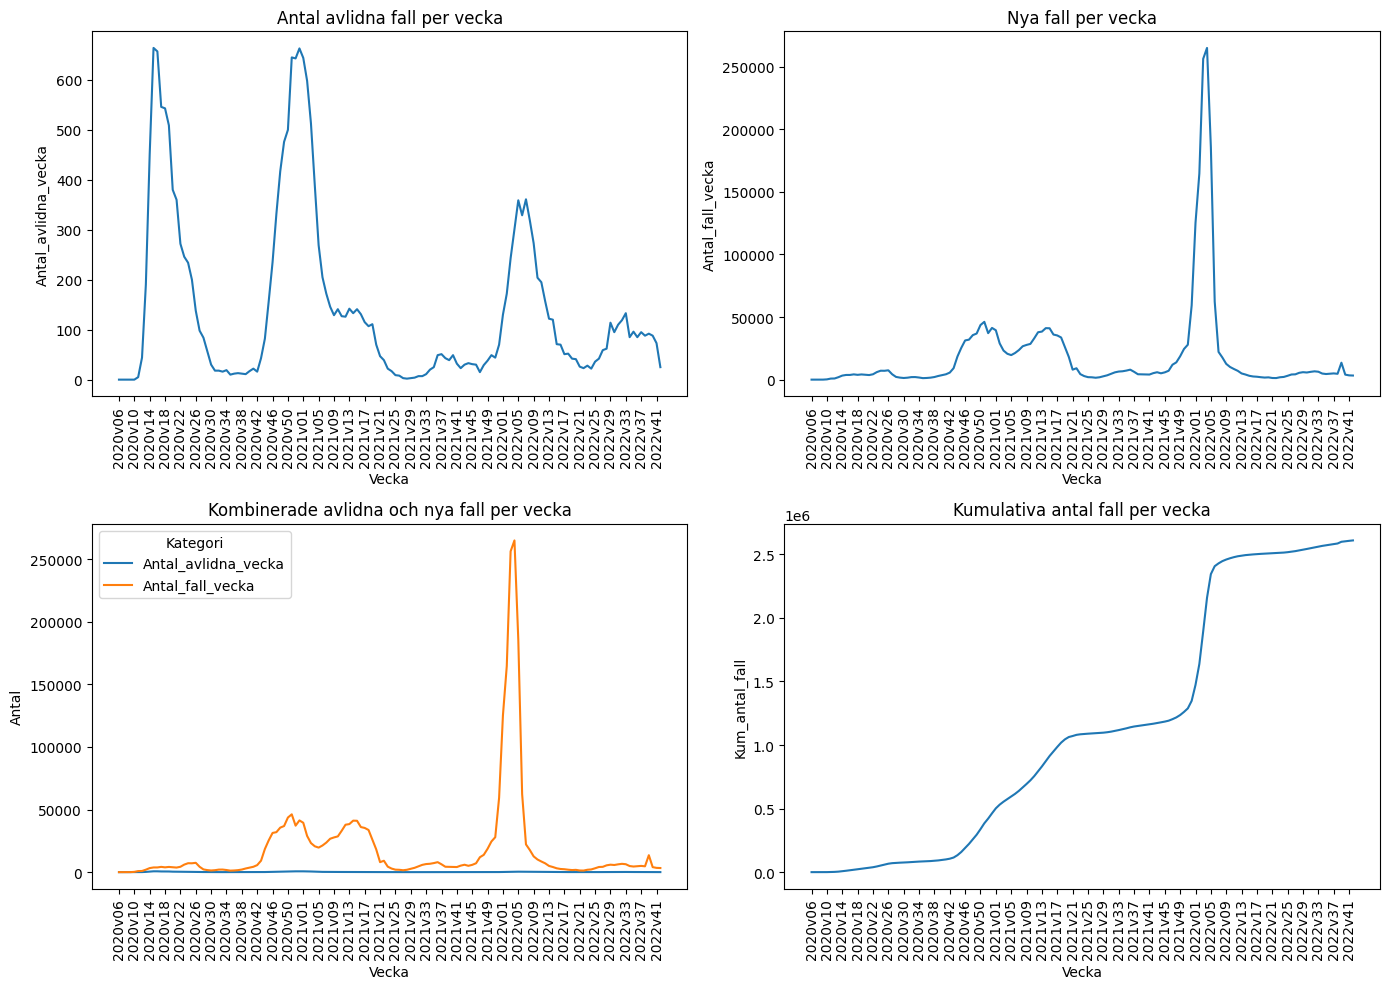

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Förbereder subplottens storlek.
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) # Justerad storlek för bättre visuell representation.

# Anpassar antalet etiketter som visas på x-axeln till var fjärde vecka för att undvika överlappning.
# Skapar en variabel för att justera x-axel etiketter för läsbarhet.
ticks_to_show = df_covid19['Vecka'].iloc[::4]
set_rotation = 90

# Första subplot-linjediagrammet över antalet avlidna fall per vecka.
sns.lineplot(data=df_covid19, x='Vecka', y='Antal_avlidna_vecka', ax=axs[0, 0])
axs[0, 0].set_title("Antal avlidna fall per vecka")
axs[0, 0].set_xticks(ticks_to_show.index)
axs[0, 0].set_xticklabels(ticks_to_show.values, rotation= set_rotation)

# Andra subplot-linjediagrammet över antalet fall per vecka.
sns.lineplot(data=df_covid19, x='Vecka', y='Antal_fall_vecka', ax=axs[0, 1])
axs[0, 1].set_title("Nya fall per vecka")
axs[0, 1].set_xticks(ticks_to_show.index)
axs[0, 1].set_xticklabels(ticks_to_show.values, rotation= set_rotation)

# Tredje subplot-linjediagrammet är ett kombinerat linjediagram för att visa trendea av avlidna och nya COVID-19 fall per vecka.
# Smälter data för att få 'Antal_avlidna_vecka' och 'Antal_fall_vecka' i samma kolumn.
melted_df = df_covid19.melt(id_vars=['Vecka'], value_vars=['Antal_avlidna_vecka', 'Antal_fall_vecka'], var_name='Kategori', value_name='Antal')

# Använder 'hue' parametern som automatiskt både tilldelar olika färger till varje kategori
# och skapar en legend för att förklara vilken färg som motsvarar vilken kategori.
sns.lineplot(x='Vecka', y='Antal', hue='Kategori', data=melted_df, ax=axs[1, 0])
axs[1, 0].set_title("Kombinerade avlidna och nya fall per vecka")
axs[1, 0].set_xticks(ticks_to_show.index)
axs[1, 0].set_xticklabels(ticks_to_show.values, rotation= set_rotation)

# Fjärde subplot-linjediagrammet som är för kumulativa antal fall.
sns.lineplot(data=df_covid19, x='Vecka', y='Kum_antal_fall', ax=axs[1, 1])
axs[1, 1].set_title("Kumulativa antal fall per vecka")
axs[1, 1].set_xticks(ticks_to_show.index)
axs[1, 1].set_xticklabels(ticks_to_show.values, rotation= set_rotation)

# Anpassar layouten så att allt får plats och inget klipps bort i den sparade PNG-filen.
plt.tight_layout()

# Sparar diagrammet som en PNG-fil med en vit bakgrundsfärg för att undvika att den visas som transparent.
plt.savefig('Visualisering/2x2_covid19_linjediagram.png', facecolor='w')

# Visar plottarna
plt.show()

In [8]:
import plotly.express as px

# Skapar ett linjediagram för antalet avlidna fall per vecka.
fig = px.line(df_covid19, x='Vecka', y='Antal_avlidna_vecka', title='Antal avlidna fall per vecka')

# Förbättrar layouten.
fig.update_layout(
    xaxis_title='Vecka',
    yaxis_title='Antal avlidna',
    xaxis=dict(
        tickmode='array',
        tickvals=df_covid19['Vecka'][::2]), # Anpassar antalet etiketter som visas på x-axeln till varannan vecka för att undvika överlappning .

    xaxis_tickangle= -90  # Roterar etiketterna på x-axeln för bättre läsbarhet.
)

fig.show()
# Sparar grafen som en HTML-fil.
fig.write_html('Visualisering/avlidna_per_vecka.html')

# Linjediagram för nya fall per vecka.
fig = px.line(df_covid19, x='Vecka', y='Antal_fall_vecka', title='Nya fall per vecka')
fig.update_layout(xaxis_title='Vecka', yaxis_title='Antal nya fall', xaxis=dict(tickmode='array', tickvals=df_covid19['Vecka'][::2]), xaxis_tickangle=-90)
fig.show()
fig.write_html('Visualisering/nya_fall_per_vecka.html')

# Linjediagram för avlidna och nya fall per vecka i samma fönster.
# 'color' parametern tilldelar olika färger baserat på värdena i 'Kategori' kolumnen.
fig = px.line(melted_df, x='Vecka', y='Antal', color='Kategori', title='Kombinerade avlidna och nya fall per vecka')
fig.update_layout(xaxis_title='Vecka', yaxis_title='Antal fall', xaxis=dict(tickmode='array', tickvals=melted_df['Vecka'][::2]), xaxis_tickangle=-90)
fig.show()
fig.write_html('Visualisering/kombinerade_avlidna_och_nya_fall_per_vecka.html')

# Linjediagram för kumulativt antal fall per vecka.
fig = px.line(df_covid19, x='Vecka', y='Kum_antal_fall', title='Kumulativa antal fall per vecka')
fig.update_layout(xaxis_title='Vecka', yaxis_title='Kumulativt antal fall', xaxis=dict(tickmode='array', tickvals=df_covid19['Vecka'][::2]), xaxis_tickangle=-90)
fig.show()
fig.write_html('Visualisering/kumulativa_fall_per_vecka.html')

In [9]:
# Läser in fliken "Vaccinerade kommun och ålder" från datafilen "fhm_covid19_vaccin".
df_covid19_vaccin = pd.read_excel('Data/fhm_covid19_vaccin.xlsx', sheet_name='Vaccinerade kommun och ålder')

# Räknar antalet län
antal_lan = df_covid19_vaccin['Län'].nunique()
print(f"Antalet län som är representerade i datasetet: {antal_lan}")

# Räknar antelet kommuner
antal_kommuner = df_covid19_vaccin['Kommun'].nunique()
print(f"Antalet kommuner som är representerade i datasetet: {antal_kommuner}")

# Summa av befolkningen i datafilen
total_befolkning_dataset = df_covid19_vaccin['Befolkning'].sum()
print(f"Totala befolkningen som är representerad i datasetet: {total_befolkning_dataset}")

Antalet län som är representerade i datasetet: 21
Antalet kommuner som är representerade i datasetet: 290
Totala befolkningen som är representerad i datasetet: 9092790


In [10]:
# Filtrera datasetet för åldersgrupperna under 18 år
barn_under_18_df = df_covid19_vaccin[df_covid19_vaccin['Ålder'].isin(['12-15', '16-17'])]

# Summera 'Befolkning'-kolumnen för att få det totala antalet barn under 18 år
totalt_barn_under_18_dataset = barn_under_18_df['Befolkning'].sum()
print(f"Totalt antal barn under 18 år i datasetet: {totalt_barn_under_18_dataset}")

Totalt antal barn under 18 år i datasetet: 745370


In [11]:
# Läser in fliken "Vaccinationer tidsserie" från datafilen "fhm_covid19_vaccin".
# För att ta fram till vilket datum datat sträcker sig till.
df_covid19_vaccin_tidsserie = pd.read_excel('Data/fhm_covid19_vaccin.xlsx', sheet_name='Vaccinationer tidsserie')

# Konkatinerar 'Vecka' och 'År' till en 'Datum' kolumn.
df_covid19_vaccin_tidsserie['Datum'] = (df_covid19_vaccin_tidsserie['År'].astype(str) + 'v' + df_covid19_vaccin_tidsserie['Vecka'].astype(str).str.zfill(2))
# Hitta senaste datumet i datasetet.
senaste_datum = df_covid19_vaccin_tidsserie['Datum'].max()
print(f"Senaste datumet i datasetet: {senaste_datum}")

Senaste datumet i datasetet: 2022v42


In [12]:
import requests

# URL till SCB API för att hämta befolkningsdata.
url = "https://api.scb.se/OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101A/BefolkManad"

# Förfrågan till API:et, definierad som en Python dictionary.
# Hämtar data för den totala befolkningen i Sverige, över alla åldrar och båda könen,
# Specifikt för oktober 2022 vilket motsvarar det senaste datumet i datasetet.
query = {
    "query": [
        {
            "code": "Region",
            "selection": {
                "filter": "vs:HelaRiket",
                "values": ["00"]
            }
        },
        {
            "code": "Alder",
            "selection": {
                "filter": "vs:Ålder1årA",
                "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
            }
        },
        {
            "code": "Kon",
            "selection": {
                "filter": "item",
                "values": ["1", "2"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "item",
                "values": ["2022M10"]
            }
        }
    ],
    "response": {
        "format": "json"
    }
} # Kodsnuttar tagna från SCB

# Skickar förfrågan till SCB:s API med den definierade queryn.
response = requests.post(url, json=query)

In [13]:
# Sparar svaret från API förfrågan som innehåller datan
folkmangd_data = response.json()['data']

# Beräknar den totala befolkningen för oktober 2022, vilket motsvarar sista datumet för vaccindatan 2022v42
total_folkmangd_scb = sum(int(record['values'][0]) for record in folkmangd_data)

# Beräknar den totala befolkningen för barn under 18 år.
total_barn_under_18_scb = sum(
    int(record['values'][0])
    for record in folkmangd_data
    if record['key'][1].isdigit() and int(record['key'][1]) < 18
)

In [14]:
# Beräknar antalet barn under 12 år från 'folkmangd_data' taget från från SCB API:et.
antal_barn_under_12_scb = sum(
    int(record['values'][0]) for record in folkmangd_data
    if record['key'][1].isdigit() and int(record['key'][1]) < 12
)

# Lägger till antalet barn under 12 år till det totala antalet barn från 12 till 17 år från dataset.
totalt_antal_barn_under_18 = antal_barn_under_12_scb + totalt_barn_under_18_dataset

# Den totala befolkningen från dataset minus barnen från 12 till 17 år.
befolkning_utan_barn_dataset = total_befolkning_dataset - totalt_barn_under_18_dataset
# Beräknar den uppskattade totala befolkningen i Sverige:
uppskattad_total_befolkning = befolkning_utan_barn_dataset + totalt_antal_barn_under_18

# Skillnaden mellan SCB:s totala befolkning och den uppskattade totala befolkning.
# Möjliga anledningar till skillnaden kan vara bland annat:
# Datasetet genomgått en rensning på personer som avlidit fram till och med den 30 juni 2022.
# Datasetet tog slut en vecka innan: 2022/10/23 (v42) och den totla folkmängden från SCB är fram till 2022/10/31.
skillnad = total_folkmangd_scb - uppskattad_total_befolkning

In [37]:
# Skapa en dataframe för att visualisera datan
data = {
    'Beskrivning': [
        "Total befolkning i Sverige (SCB)",
        "Barn under 18 år (SCB)",
        "Befolkning utan barn under 18 år (Dataset)",
        "Barn under 12 år (SCB)",
        "Barn under 18 år (Dataset + SCB)",
        "Uppskattad total befolkning",
        "Skillnad (SCB vs Uppskattad)"
    ],
    'Antal': [
        total_folkmangd_scb,
        total_barn_under_18_scb,
        befolkning_utan_barn_dataset,
        antal_barn_under_12_scb,
        totalt_barn_under_18_dataset,
        uppskattad_total_befolkning,
        skillnad
    ]
}

df_barn_under_18 = pd.DataFrame(data)

# Visa dataframe.
df_barn_under_18

,Beskrivning,Antal
0,Total befolkning i Sverige (SCB),10514692
1,Barn under 18 år (SCB),2178123
2,Befolkning utan barn under 18 år (Dataset),8347420
3,Barn under 12 år (SCB),1431883
4,Barn under 18 år (Dataset + SCB),745370
5,Uppskattad total befolkning,10524673
6,Skillnad (SCB vs Uppskattad),-9981


In [17]:
# Ritar åldersfördelning av Sveriges befolkning.
alder_fordelning = px.bar(
    df_covid19_vaccin.groupby('Ålder', as_index=False)['Befolkning'].sum(),
    x='Ålder', 
    y='Befolkning', 
    title='Åldersfördelning av Sveriges befolkning'
)
alder_fordelning.show()

In [46]:
# Ritar ett stapeldiagram för att visa genomsnittlig andel av befolkningen med minst 1, 2 och 3 doser per län.
sammanstallning_lan = df_covid19_vaccin.groupby('Län_namn').agg({
    'Andel minst 1 dos': 'mean',
    'Andel minst 2 doser': 'mean',
    'Andel 3 doser': 'mean'
}).reset_index()

# Avrundar andelar till två decimaler för presentation som procenttal.
sammanstallning_lan['Andel minst 1 dos'] = sammanstallning_lan['Andel minst 1 dos'].round(2)
sammanstallning_lan['Andel minst 2 doser'] = sammanstallning_lan['Andel minst 2 doser'].round(2)
sammanstallning_lan['Andel 3 doser'] = sammanstallning_lan['Andel 3 doser'].round(2)

# Skapar ett grupperat stapeldiagram för att jämföra och visa mellan antalet doser per län.
fig_doser_per_lan = px.bar(
    sammanstallning_lan,
    x='Län_namn',
    y=['Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser'],
    barmode='group',
    title='Andel vaccinerade med minst 1, 2 och 3 doser per län (i procent)',
    labels={'value': 'Andel (%)', 'variable': 'Dostyp'}
)
# Uppdaterar y-axeln för att visa ett fast procentintervall från 0 till 100%
fig_doser_per_lan.update_yaxes(range=[0, 1])
fig_doser_per_lan.update_layout(yaxis_tickformat='%')
fig_doser_per_lan.show()

In [53]:
# Filtrerar dataframe för att endast inkludera Västra Götalands län och Stockholms län.
valda_lan_data = df_covid19_vaccin[df_covid19_vaccin['Län_namn'].isin(['Västra Götalands län', 'Stockholms län'])]

# Uppdaterar 'sammanstallning_lan' för att endast inkludera de valda länen.
valda_lan_sammanstallning = valda_lan_data.groupby('Län_namn').agg({
    'Andel minst 1 dos': 'mean',
    'Andel minst 2 doser': 'mean',
    'Andel 3 doser': 'mean',
    'Andel 4 doser': 'mean'
}).reset_index()

# Avrundar till två decimaler.
for column in valda_lan_sammanstallning.columns[1:]:
    valda_lan_sammanstallning[column] = valda_lan_sammanstallning[column].round(2)

# Skapar en ny figur för de valda länen.
fig_valda_lan = px.bar(
    valda_lan_sammanstallning,
    x='Län_namn',
    y=['Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser', 'Andel 4 doser'],
    barmode='group',
    title='Andel vaccinerade med minst 1, 2, 3 och 4 doser i Västra Götalands län och Stockholms län (i procent)',
    labels={'value': 'Andel (%)', 'variable': 'Dostyp'}
)

# Uppdaterar och visar diagrammet
fig_valda_lan.update_yaxes(range=[0, 1]) 
fig_valda_lan.update_layout(yaxis_tickformat='%')
fig_valda_lan.show()
